In [54]:
import pandas as pd
train_X = pd.read_csv("train_X.csv")
train_y = pd.read_csv("train_y.csv")
val_X = pd.read_csv("val_X.csv")
val_y = pd.read_csv("val_y.csv")

In [55]:
train_y['label'].value_counts()

0    225055
1     25819
Name: label, dtype: int64

In [56]:
train = pd.read_csv("train.csv")
train.head()

,ex_id,user_id,prod_id,rating,label,date,review
0,0,923,0,3.0,1,2014-12-08,The food at snack is a selection of popular Gr...
1,1,924,0,3.0,1,2013-05-16,This little place in Soho is wonderful. I had ...
2,2,925,0,4.0,1,2013-07-01,ordered lunch for 15 from Snack last Friday. ...
3,3,926,0,4.0,1,2011-07-28,This is a beautiful quaint little restaurant o...
4,4,927,0,4.0,1,2010-11-01,Snack is great place for a casual sit down lu...


In [4]:
val = pd.read_csv("dev.csv")
val.head()

,ex_id,user_id,prod_id,rating,label,date,review
0,11,934,0,5.0,1,2014-01-20,"all around good place, cozy, I came in and did..."
1,17,940,0,4.0,0,2014-09-16,"For lunch, my friend and I had: -Lamb sandwich..."
2,20,943,0,5.0,0,2014-05-24,Some good Big Greek cooking!! Came to City on ...
3,30,953,0,4.0,0,2013-10-17,So... as you may notice from some of my other ...
4,43,966,0,3.0,0,2012-12-19,"I don't understand the whole ""You can't order ..."


In [ ]:
train['cleaned review'] = train_X['cleaned review']
val['cleaned review'] = val_X['cleaned review']

In [14]:
from imblearn.over_sampling import RandomOverSampler
import numpy as np
ros = RandomOverSampler()
train_X_ros, train_y_ros = ros.fit_sample(train_X, np.array(train_y['label']))

In [15]:
#train_X_ros = pd.DataFrame(train_X_ros, columns = ['ex_id','user_id','prod_id','rating','date','review','cleaned review','text length','word length'])
train_X_up = pd.DataFrame(train_X_ros, columns = ['ex_id','user_id','prod_id','rating','date','review','cleaned review'])
train_y_up = pd.DataFrame(train_y_ros)

In [16]:
train_X_up['rating'].value_counts()

5.0    190648
4.0    151977
3.0     50298
1.0     29925
2.0     27262
Name: rating, dtype: int64

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=20000,ngram_range=(1,2))
vectorizer.fit(train_X_up['cleaned review'])
features = vectorizer.get_feature_names()
BoW_train_X = vectorizer.transform(train_X_up['cleaned review'])
BoW_val_X = vectorizer.transform(val_X['cleaned review'])

In [45]:
print(BoW_train_X.shape)
print(BoW_val_X.shape)

(450110, 20000)
(35918, 20000)


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
def trainlr(BoW_train_X,train_y_up,BoW_val_X,val_y):
    lr = LogisticRegression(max_iter=2000,C=0.1)

    lr.fit(BoW_train_X, train_y_up)
    preds_nb = lr.predict_proba(BoW_val_X)[:,1]
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')

    nb_fpr, nb_tpr, nb_thresholds = roc_curve(val_y, preds_nb)
    nb_roc_auc = auc(nb_fpr, nb_tpr)
    ap = average_precision_score(val_y, preds_nb)
    nb_curve = plt.plot(nb_fpr, nb_tpr, label = 'LR' + ' (AUC = %0.3f)' % nb_roc_auc+', (AP = %0.3f)' % ap)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.show()
    return ap,nb_roc_auc

C:\Users\xinme\Anaconda2\envs\py3.6\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


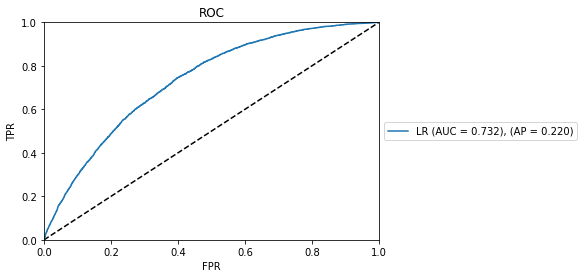

In [53]:
trainlr(BoW_train_X,train_y_up,BoW_val_X,val_y)

In [61]:
train_XX = pd.DataFrame()
train_XX['cleaned review']=train_X['cleaned review']

In [68]:
train = pd.read_csv('train.csv')
val = pd.read_csv('dev.csv')

1

### diff is the number of months between the earliest and latest review for a user <br> single is 1 if this user only posts review in one day, i.e. diff=0. <br> old is 1 if the user's diff>6 months.

In [57]:
train['date'] = pd.to_datetime(train['date'])
train['ym'] = train['date'].dt.strftime('%Y-%m')
datedf = pd.DataFrame()
datedf['max']=  train.groupby(['user_id'])['date'].max()
datedf['min']=  train.groupby(['user_id'])['date'].min()
datedf['diff'] = (datedf['max']-datedf['min']).astype('timedelta64[M]')
train['diff'] = train['user_id'].map(datedf['diff'].to_dict())

In [58]:
train['single'] = train['diff']==0
train['single'] = train['single'].astype(int)

In [59]:
train['old'] = train['diff']>6
train['old'] = train['old'].astype(int)

In [60]:
train

,ex_id,user_id,prod_id,rating,label,date,review,diff,single,old
0,0,923,0,3.0,1,2014-12-08,The food at snack is a selection of popular Gr...,13.0,0,1
1,1,924,0,3.0,1,2013-05-16,This little place in Soho is wonderful. I had ...,0.0,1,0
2,2,925,0,4.0,1,2013-07-01,ordered lunch for 15 from Snack last Friday. ...,0.0,1,0
3,3,926,0,4.0,1,2011-07-28,This is a beautiful quaint little restaurant o...,0.0,1,0
4,4,927,0,4.0,1,2010-11-01,Snack is great place for a casual sit down lu...,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...
250869,358950,14671,349,5.0,0,2014-02-08,Made a reservation for an early dinner Saturda...,17.0,0,1
250870,358951,3356,349,5.0,0,2014-02-07,"Emily is like Franny's Marco, but with warmth ...",77.0,0,1
250871,358953,116424,349,5.0,0,2014-01-31,Can't say enough good things about this place....,0.0,1,0
250872,358954,161147,349,5.0,0,2014-01-30,"Had a great dinner here- fantastic pizza, the ...",0.0,1,0


In [62]:
val['date'] = pd.to_datetime(val['date'])
val['ym'] = val['date'].dt.strftime('%Y-%m')
datedf = pd.DataFrame()
datedf['max']=  val.groupby(['user_id'])['date'].max()
datedf['min']=  val.groupby(['user_id'])['date'].min()
datedf['diff'] = (datedf['max']-datedf['min']).astype('timedelta64[M]')
val['diff'] = val['user_id'].map(datedf['diff'].to_dict())

In [63]:
val['single'] = val['diff']==0
val['single'] = val['single'].astype(int)
val['old'] = val['diff']>6
val['old'] = val['old'].astype(int)

We observe that spammers tend to be active in a short range of time.

In [108]:
train.groupby('label')['diff','single','old'].mean()

C:\Users\xinme\Anaconda2\envs\py3.6\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,diff,single,old
label,,,
0,16.263660,0.408469,0.489089
1,1.786165,0.853557,0.079244


C:\Users\xinme\Anaconda2\envs\py3.6\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


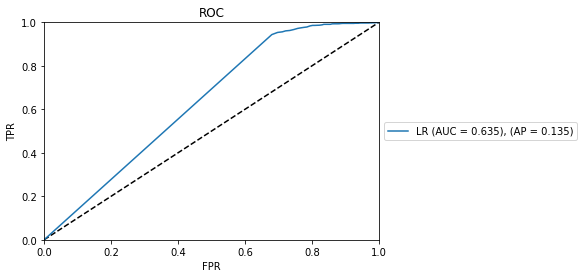

(0.13494849654239266, 0.6354150824118321)

In [67]:
trainlr(train['diff'].values.reshape(-1, 1),train['label'].values.reshape(-1, 1)
        ,val['diff'].values.reshape(-1, 1),val['label'].values.reshape(-1, 1))

C:\Users\xinme\Anaconda2\envs\py3.6\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


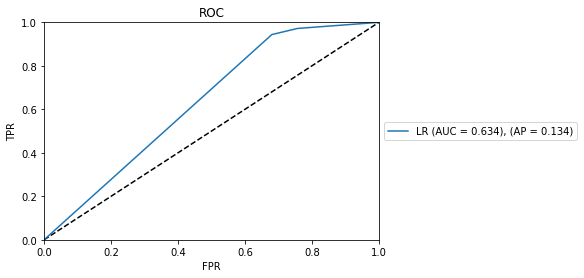

(0.13437763342360387, 0.634128527324276)

In [70]:
trainlr(train[['single','old']].values,train['label'].values.reshape(-1, 1)
        ,val[['single','old']].values,val['label'].values.reshape(-1, 1))

C:\Users\xinme\Anaconda2\envs\py3.6\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


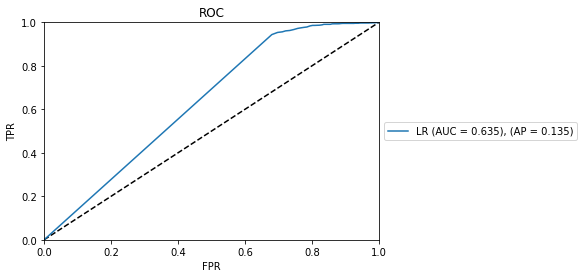

(0.13494849654239266, 0.6354150824118321)

In [107]:
trainlr(train[['diff','single','old']].values,train['label'].values.reshape(-1, 1)
        ,val[['diff','single','old']].values,val['label'].values.reshape(-1, 1))

2

### Count the maximum number of reviews the user post in one month. 看网上说spammer经常在短时间发好多条但是我们data里看起来nonfake的user发的更多。。。。。可能没啥意义

In [71]:
day_num = train.groupby(['user_id','ym'], as_index=False)['prod_id'].count()

In [72]:
max_m = day_num.groupby(['user_id'])['prod_id'].max().to_dict()
train['max_review'] = train['user_id'].map(max_m)

In [73]:
val['ym'] = val['date'].dt.strftime('%Y-%m')
day_num = val.groupby(['user_id','ym'], as_index=False)['prod_id'].count()
max_day = day_num.groupby('user_id')['prod_id'].max().to_dict()
val['max_review'] = val['user_id'].map(max_day)

In [105]:
train.groupby('label')['max_review'].mean()

label
0    2.173589
1    1.474844
Name: max_review, dtype: float64

C:\Users\xinme\Anaconda2\envs\py3.6\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


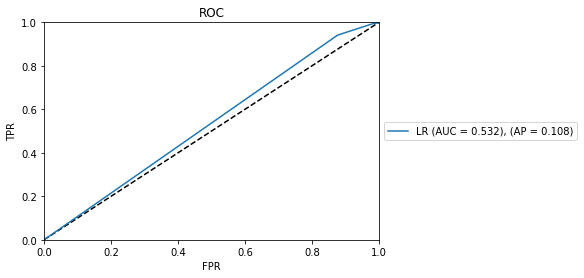

(0.10789867262560048, 0.5324171286064946)

In [74]:
trainlr(train['max_review'].values.reshape(-1, 1),train['label'].values.reshape(-1, 1)
        ,val['max_review'].values.reshape(-1, 1),val['label'].values.reshape(-1, 1))

3.

### user_avg_rating is the average of all of the ratings given by a user <br> user_tot_prod is the number of products that a user has reviewed <br> prod_avg_rating is the average rating of a product given by all of the users <br> prod_rating_diff is the deviation of the rating given by a user from the average rating of this product

In [93]:
import numpy as np
user_avg_rating = round(train.groupby('user_id')['rating'].mean(), 3).to_dict()
user_tot_prod = train.groupby('user_id')['prod_id'].count().to_dict()
train['user_avg_rating'] = train['user_id'].map(user_avg_rating)
train['user_tot_prod'] = train['user_id'].map(user_tot_prod)
prod_avg_rating = round(train.groupby('prod_id')['rating'].mean(), 3).to_dict()
train['prod_avg_rating'] = train['prod_id'].map(prod_avg_rating)
train['prod_rating_diff'] = np.abs(train['rating']-train['prod_avg_rating'])
train.head(2)

,ex_id,user_id,prod_id,rating,label,date,review,diff,single,old,ym,max_review,user_avg_rating,user_tot_prod,prod_avg_rating,prod_rating_diff,user_avg_rating_diff
0,0,923,0,3.0,1,2014-12-08,The food at snack is a selection of popular Gr...,13.0,0,1,2014-12,4,4.5,26,3.955,0.955,4.5
1,1,924,0,3.0,1,2013-05-16,This little place in Soho is wonderful. I had ...,0.0,1,0,2013-05,1,3.0,1,3.955,0.955,3.0


In [94]:
user_avg_rating = round(val.groupby('user_id')['rating'].mean(), 3).to_dict()
user_tot_prod = val.groupby('user_id')['prod_id'].count().to_dict()
val['user_avg_rating'] = val['user_id'].map(user_avg_rating)
val['user_tot_prod'] = val['user_id'].map(user_tot_prod)
prod_avg_rating = round(val.groupby('prod_id')['rating'].mean(), 3).to_dict()
val['prod_avg_rating'] = val['prod_id'].map(prod_avg_rating)
val['prod_rating_diff'] = np.abs(val['rating']-val['prod_avg_rating'])
val.head(2)

,ex_id,user_id,prod_id,rating,label,date,review,diff,single,old,ym,max_review,user_avg_rating,user_tot_prod,prod_avg_rating,prod_rating_diff
0,11,934,0,5.0,1,2014-01-20,"all around good place, cozy, I came in and did...",0.0,1,0,2014-01,1,5.0,1,4.278,0.722
1,17,940,0,4.0,0,2014-09-16,"For lunch, my friend and I had: -Lamb sandwich...",0.0,1,0,2014-09,1,4.0,1,4.278,0.278


We observe that the spammers tend to review less products and have a larger rating deviation

In [109]:
train.groupby('label')['user_avg_rating','user_tot_prod','prod_rating_diff'].mean()

C:\Users\xinme\Anaconda2\envs\py3.6\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,user_avg_rating,user_tot_prod,prod_rating_diff
label,,,
0,4.032218,7.745240,0.758406
1,3.949616,2.267206,0.973020


C:\Users\xinme\Anaconda2\envs\py3.6\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


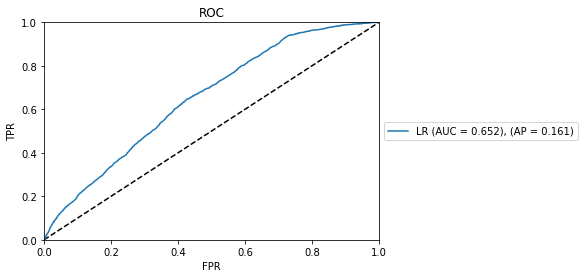

(0.16126700788578524, 0.6518289181467769)

In [96]:
trainlr(train[['user_avg_rating','user_tot_prod','prod_rating_diff']].values,train['label'].values.reshape(-1, 1)
        ,val[['user_avg_rating','user_tot_prod','prod_rating_diff']].values,val['label'].values.reshape(-1, 1))

4.

### user_avg_rating_diff is the average rating deviation across all products reviewed by a user.

In [100]:
user_avg_rating_diff = round(train.groupby('user_id')['prod_rating_diff'].mean(), 3).to_dict()
train['user_avg_rating_diff'] = train['user_id'].map(user_avg_rating_diff)
train.head(2)

,ex_id,user_id,prod_id,rating,label,date,review,diff,single,old,ym,max_review,user_avg_rating,user_tot_prod,prod_avg_rating,prod_rating_diff,user_avg_rating_diff
0,0,923,0,3.0,1,2014-12-08,The food at snack is a selection of popular Gr...,13.0,0,1,2014-12,4,4.5,26,3.955,0.955,0.747
1,1,924,0,3.0,1,2013-05-16,This little place in Soho is wonderful. I had ...,0.0,1,0,2013-05,1,3.0,1,3.955,0.955,0.955


In [111]:
user_avg_rating_diff = round(val.groupby('user_id')['prod_rating_diff'].mean(), 3).to_dict()
val['user_avg_rating_diff'] = val['user_id'].map(user_avg_rating_diff)

In [104]:
train.groupby('label')['user_avg_rating_diff'].mean()

label
0    0.758583
1    0.971464
Name: user_avg_rating_diff, dtype: float64

C:\Users\xinme\Anaconda2\envs\py3.6\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


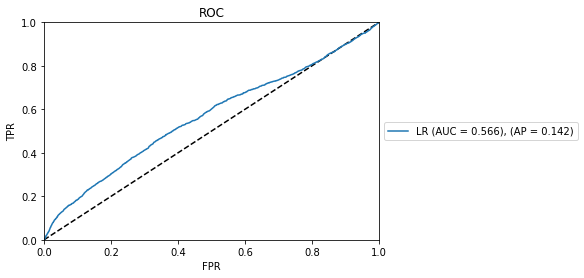

(0.14240474318246754, 0.5659753496743485)

In [112]:
trainlr(train['user_avg_rating_diff'].values.reshape(-1, 1),train['label'].values.reshape(-1, 1)
        ,val['user_avg_rating_diff'].values.reshape(-1, 1),val['label'].values.reshape(-1, 1))

5.

### count is the number of words in the review

In [122]:
train['count'] = train['review'].str.split().str.len()
val['count'] = val['review'].str.split().str.len()

We observe that spammers tend to write shorted reviews.

In [123]:
train.groupby('label')['count'].mean()

label
0    120.507005
1     81.399744
Name: count, dtype: float64

C:\Users\xinme\Anaconda2\envs\py3.6\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


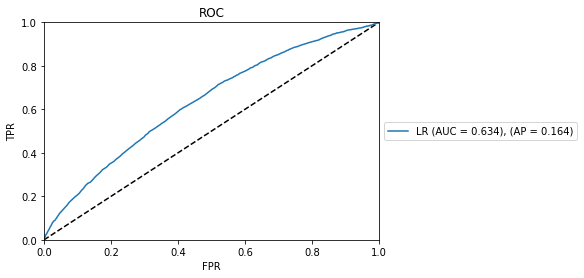

(0.16381828813662722, 0.6341794995555592)

In [124]:
trainlr(train['count'].values.reshape(-1, 1),train['label'].values.reshape(-1, 1)
        ,val['count'].values.reshape(-1, 1),val['label'].values.reshape(-1, 1))

6.

### Try compute the median and max of the similarity between any two reviews given by a user. <br> TAKE FOREVER TO RUN. HAS RUN ALMOST 3hs. 我是用的word2vect可能其他的会快一点。。。不清楚。。。

In [128]:
from gensim.models import KeyedVectors
wv = KeyedVectors.load("model.wv", mmap='r')

In [135]:
from scipy import spatial
index2word_set = set(wv.index2word)

def avg_feature_vector(sentence, model, num_features, index2word_set):
    words = sentence.split()
    feature_vec = np.zeros((num_features, ), dtype='float32')
    n_words = 0
    for word in words:
        if word in index2word_set:
            n_words += 1
            feature_vec = np.add(feature_vec, model[word])
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)
    return feature_vec

In [136]:
from gensim.models import Word2Vec
model = Word2Vec.load("word2vec.model")

In [148]:
def sim(i,j,model,index2word_set):
    s1_afv = avg_feature_vector(train['cleaned review'].iloc[i], model=model, num_features=300, index2word_set=index2word_set)
    s2_afv = avg_feature_vector(train['cleaned review'].iloc[j], model=model, num_features=300, index2word_set=index2word_set)
    sim = 1 - spatial.distance.cosine(s1_afv, s2_afv)
    return sim

In [166]:
user_li = train['user_id'].values

In [ ]:
user_median = []
user_max = []

for u in user_li:
    b = train[train['user_id']==u]['cleaned review'].values
    simli = []
    if len(b)<=1:
        user_median.append(None)
        user_max.append(None)
    else:
        for i in range(len(b)-1):
            for j in range(i+1,len(b)):
                simli.append(sim(i,j,model,index2word_set))
        user_median.append(np.median(simli))
        user_max.append(max(simli))


C:\Users\xinme\Anaconda2\envs\py3.6\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


In [196]:
sim_df = pd.DataFrame()
sim_df['user_id'] = user_li
sim_df['sim_median'] = user_median
sim_df['sim_max'] = user_max
train['sim_median'] = train['user_id'].map(sim_df['sim_median'].to_dict())

,ex_id,user_id,prod_id,rating,label,date,review,diff,single,old,ym,max_review,user_avg_rating,user_tot_prod,prod_avg_rating,prod_rating_diff,user_avg_rating_diff,count,cleaned review
1004,1440,2347,6,3.0,0,2013-02-17,Cute restaurant but filled with college aged d...,0.0,1,0,2013-02,1,4.0,2,4.202,1.202,1.066,35,b'cute restaur fill colleg age diner food good...
221552,316976,2347,837,5.0,0,2013-03-14,My Go- To dinner spot on the UES! Resonably pr...,0.0,1,0,2013-03,1,4.0,2,4.069,0.931,1.066,29,b'dinner spot ue reson price nice ambienc impo...


## Ignore code below. 

In [41]:
from xgboost.sklearn import XGBClassifier
model = XGBClassifier(scale_pos_weight=10,objective= 'binary:logistic',n_estimators=100)
model.fit(BoW_train_X_ori, train_y, verbose=False)

C:\Users\xinme\Anaconda2\envs\py3.6\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xinme\Anaconda2\envs\py3.6\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=5,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=10, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
from sklearn.metrics import roc_auc_score
pred = model.predict(BoW_val_X)
auc = roc_auc_score(val_y, pred)
ap = average_precision_score(val_y, pred)
print(auc,ap)

0.5446131682922056 0.11053712296874886


In [33]:
from imblearn.over_sampling import SMOTE, ADASYN
train_X_ros, train_Y_ros = ADASYN().fit_resample(BoW_train_X, np.array(train_y['label']))

In [36]:
train_X_ros.shape

(455557, 1000)

In [25]:
train_X_up = pd.DataFrame(train_X_ros)
train_y_up = pd.DataFrame(train_y_ros)

In [28]:
train_y_up[0].value_counts()

1    225055
0    225055
Name: 0, dtype: int64

In [32]:
lr = LogisticRegression()
lr.fit(train_X_ros, train_Y_ros)
preds_nb = lr.predict_proba(BoW_val_X)[:,1]
nb_fpr, nb_tpr, nb_thresholds = roc_curve(val_y, preds_nb)
nb_roc_auc = auc(nb_fpr, nb_tpr)
print(nb_roc_auc)

0.6870881871843383


C:\Users\xinme\Anaconda2\envs\py3.6\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [37]:
lr = LogisticRegression()
lr.fit(train_X_ros, train_Y_ros)
preds_nb = lr.predict_proba(BoW_val_X)[:,1]
nb_fpr, nb_tpr, nb_thresholds = roc_curve(val_y, preds_nb)
nb_roc_auc = auc(nb_fpr, nb_tpr)
print(nb_roc_auc)

0.6851544618732297


C:\Users\xinme\Anaconda2\envs\py3.6\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [13]:
sums = BoW_train_X.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0,col] )) 
ranking = pd.DataFrame(data1, columns = ['term','rank']) 

In [0]:
words = (ranking.sort_values('rank', ascending = False)) 

In [0]:
vacab_size = 2000

In [0]:
words.iloc[vacab_size-1]['rank']

182.08873765310474

In [0]:
import torch
import torch.nn as nn
class LSTM(nn.Module):

    def __init__(self, input_dim, hidden_dim, batch_size, output_dim=1,
                    num_layers=2):
        super(LSTM, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.batch_size = batch_size
        self.num_layers = num_layers

        # Define the LSTM layer
        self.lstm = nn.LSTM(self.input_dim, self.hidden_dim, self.num_layers)

        # Define the output layer
        self.linear = nn.Linear(self.hidden_dim, output_dim)

    def init_hidden(self):
        # This is what we'll initialise our hidden state as
        return (torch.zeros(self.num_layers, self.batch_size, self.hidden_dim),
                torch.zeros(self.num_layers, self.batch_size, self.hidden_dim))

    def forward(self, input):
        # Forward pass through LSTM layer
        # shape of lstm_out: [input_size, batch_size, hidden_dim]
        # shape of self.hidden: (a, b), where a and b both 
        # have shape (num_layers, batch_size, hidden_dim).
        lstm_out, self.hidden = self.lstm(input.view(len(input), self.batch_size, -1))
        
        # Only take the output from the final timetep
        # Can pass on the entirety of lstm_out to the next layer if it is a seq2seq prediction
        y_pred = self.linear(lstm_out[-1].view(self.batch_size, -1))
        return y_pred.view(-1)

In [0]:
h1 = 32
output_dim = 1
num_layers = 2
learning_rate = 1e-3
num_epochs = 10

In [0]:

model = LSTM(lstm_input_size, h1, batch_size=num_train, output_dim=output_dim, num_layers=num_layers)

loss_fn = torch.nn.MSELoss(size_average=False)

optimiser = torch.optim.Adam(model.parameters(), lr=learning_rate)

hist = np.zeros(num_epochs)

for t in range(num_epochs):
    # Initialise hidden state
    # Don't do this if you want your LSTM to be stateful
    model.hidden = model.init_hidden()
    y_pred = model(BoW_train_X)
    loss = loss_fn(y_pred, y_train_up)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()


In [0]:
plt.plot(y_pred.detach().numpy(), label="Preds")
plt.plot(y_train.detach().numpy(), label="Data")
plt.legend()
plt.show()

plt.plot(hist, label="Training loss")
plt.legend()
plt.show()